Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. 
Проверьте размер таблицы, типы переменных.

# Описание данных

user_data:

client – идентификатор пользователя

premium – является ли клиент премиум

age – возраст

logs:

client – идентификатор пользователя

success – результат (успех - 1, нет - 0)

platform – платформа

time – время в формате Unix




In [1]:
import pandas as pd

In [2]:
user_data = pd.read_csv('3_user_data.csv') 
logs = pd.read_csv('3_logs.csv')

# Задание 1 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [3]:
unique_platforms = logs['platform'].nunique()
unique_platforms

3

# Задание 2

С какой платформы осуществляется наибольшее количество успешных операций? (success == True)


Подсказка: вспомните команды из прошлого занятия 

Название_датафрейма.query('success == True').platform.value_counts()

а еще команда idxmax()

In [4]:
successful_operations = logs.query('success == 1')
platform_counts = successful_operations['platform'].value_counts()
most_successful_platform = platform_counts.idxmax()
most_successful_platform

'phone'

# Задание 3

Какой клиент совершил больше всего успешных операций?

Внимание: Несколько пользователей могли совершить одинаковое число успешных действий

Подсказка: вспомните команды из прошлого урока 

Название_датафрейма.query('success == True').client.value_counts()

также поможет команда max()

In [5]:
successful_operations = logs.query('success == 1')
client_counts = successful_operations['client'].value_counts()
max_operations = client_counts.max()
most_successful_clients = client_counts[client_counts == max_operations]
most_successful_clients

client
36165    41
92584    41
28719    41
82563    41
12179    41
52870    41
61468    41
78349    41
61473    41
Name: count, dtype: int64

# Задание 4

Объедините два датафрейма в один по столбцу 'client'

Подсказка: Название_датафрейма_1.merge(Название_датафрейма_2, on='client')

In [6]:
merged_data = user_data.merge(logs, on='client')
merged_data.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


# Задание 5

Какая платформа наиболее популярна среди премиумных клиентов? (premium == True)

In [7]:
premium_clients = merged_data.query('premium == True')
platform_counts = premium_clients['platform'].value_counts()
most_popular_platform = platform_counts.idxmax()
most_popular_platform

'phone'

# Задание 6

Сделайте выборку для премиальных клиентов (premium` == True) и для непримеальных.

На основе этих выборок постройте графики, первый - отображающий популярность использования различных платформ (столбец "platform") у премиальных пользователей и второй - платформы сради непримиальных пользователей. 

Подсказка: используйте sns.countplot(x=название_выборки["столбец"])

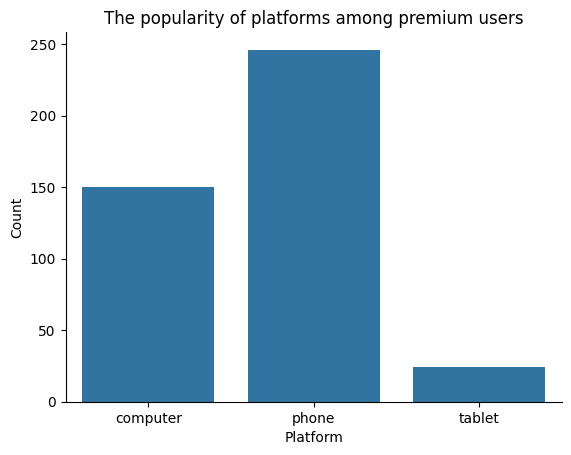

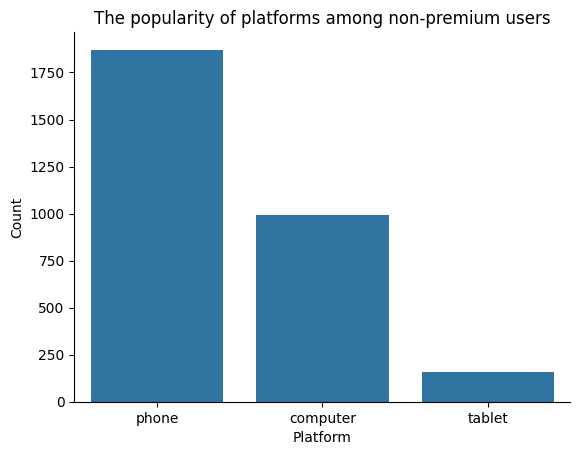

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
premium_clients = merged_data.query('premium == True')
non_premium_clients = merged_data.query('premium == False')
a = sns.countplot(x='platform', data=premium_clients)
a.set(xlabel='Platform', ylabel='Count')
sns.despine() 
plt.title('The popularity of platforms among premium users')
plt.show()
b = sns.countplot(x='platform', data=non_premium_clients)
b.set(xlabel='Platform', ylabel='Count')  
sns.despine() 
plt.title('The popularity of platforms among non-premium users')
plt.show()

# Задание 7

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. 

Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки.

Подсказка: sns.countplot(data=Название_Датафрейма.loc[(Название_Датафрейма.platform == 'computer')
                                   & (Название_Датафрейма.success == True)], x='age')

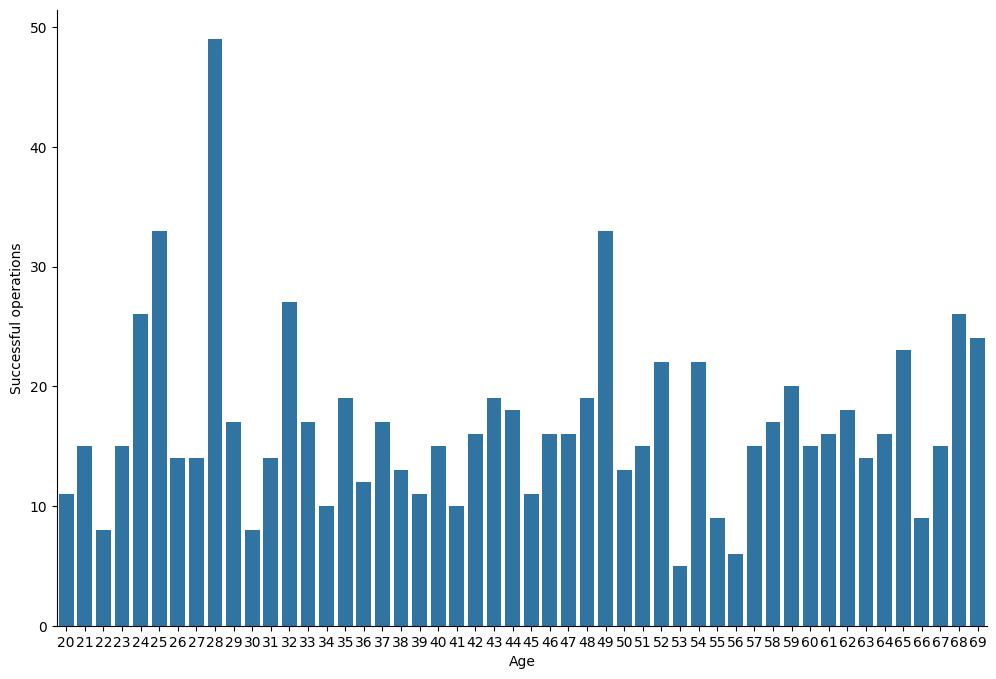

In [12]:
plt.figure(figsize=(12, 8))
filtered_data = merged_data[(merged_data['platform'] == 'computer') & (merged_data['success'] == 1)]
sns.countplot(data=filtered_data, x='age')
plt.xlabel('Age')
plt.ylabel('Successful operations')
sns.despine()
plt.show()